In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("netflix_titles.csv")

In [5]:
dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### Data Cleaning

In [6]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
dataset["director"].isnull().sum()

np.int64(2634)

In [8]:
dataset["director"]=dataset["director"].fillna("Unknown")

In [9]:
dataset["director"]

0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [10]:
dataset.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [11]:
dataset["rating"]=dataset["rating"].fillna(dataset["rating"].mode()[0])

In [12]:
dataset["rating"]

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [13]:
dataset["rating"].isnull().sum()

np.int64(0)

In [14]:
dataset.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64

In [15]:
dataset["duration"]=dataset["duration"].fillna(dataset["duration"].mode()[0])

In [16]:
dataset["duration"].isnull().sum()

np.int64(0)

In [17]:
dataset.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [18]:
dataset["date_added"].tail(10)

8797    September 13, 2018
8798     December 31, 2019
8799     February 15, 2018
8800     December 15, 2016
8801         March 9, 2016
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, dtype: object

In [19]:
dataset["date_added"].isnull().sum()

np.int64(10)

In [20]:
dataset["date_added"]=dataset["date_added"].str.replace(r'[^A-Za-z]','',regex=True)
dataset["date_added"]=dataset["date_added"].str.replace(r'[^0-9]','',regex=True)


In [21]:
dataset["data_added"]=dataset["date_added"].fillna("Unknown")

In [22]:
dataset["data_added"].isnull().sum()

np.int64(0)

In [23]:
dataset["country"]=dataset["country"].fillna("Unknown")

In [24]:
dataset["country"].isnull().sum()

np.int64(0)

In [25]:
dataset["cast"]=dataset["cast"].fillna("Unknown")

In [26]:
dataset["cast"].isnull().sum()

np.int64(0)

In [27]:
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
data_added       0
dtype: int64

In [28]:
dataset["director"]=dataset["director"].fillna("Unknown")

In [29]:
dataset["director"].isnull().sum()

np.int64(0)

In [30]:
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
data_added       0
dtype: int64

In [31]:
dataset["date_added"]=dataset["date_added"].str.replace(r'^A-Za-z','',regex=True)
dataset["date_added"]=dataset["date_added"].str.replace(r'^0-9','',regex=True)


In [32]:
dataset["date_added"]=dataset["date_added"].fillna("Unknown")

In [33]:
dataset["date_added"].isnull().sum()

np.int64(0)

In [34]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
data_added      0
dtype: int64

In [35]:
dataset["rating"]=dataset["rating"].fillna(dataset["rating"].mode()[0])

In [36]:
dataset["duration"]=dataset["duration"].fillna(dataset["duration"].mode()[0])

In [37]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
data_added      0
dtype: int64

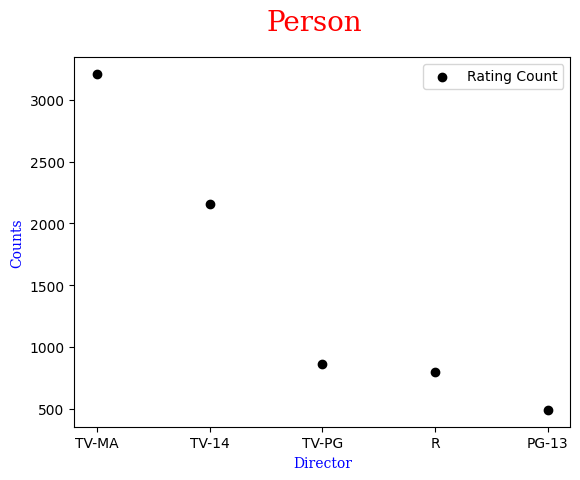

In [38]:
data=dataset["rating"].value_counts().head(5)
plt.scatter(data.index,data.values,label="Rating Count",color="black")
plt.xlabel("Director",family="serif",size=10,color="blue")
plt.ylabel("Counts",family="serif",size=10,color="blue")
plt.suptitle("Person",family="serif",size=20,color="red")
plt.legend()
plt.show()

In [39]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
data_added      0
dtype: int64

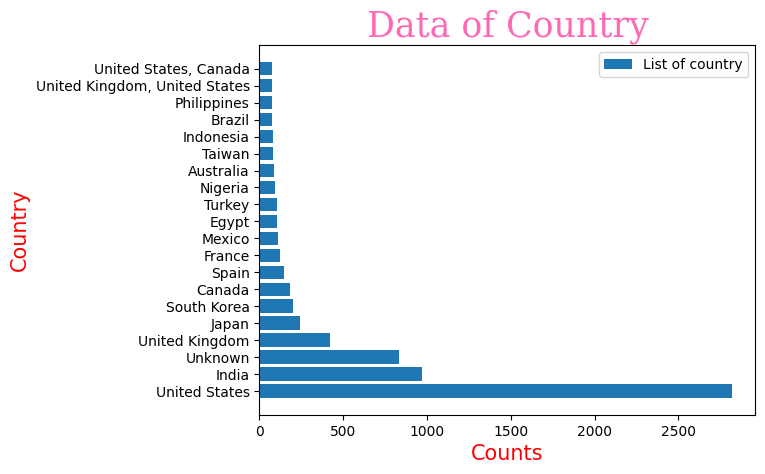

In [40]:
pop=dataset["country"].value_counts().head(20)
plt.barh(pop.index,pop.values,label="List of country")
plt.xlabel("Counts",size=15,color="red")
plt.ylabel("Country",size=15,color="red")
plt.title("Data of Country",size=25,color="hotpink",family="serif")
plt.legend()
plt.show()


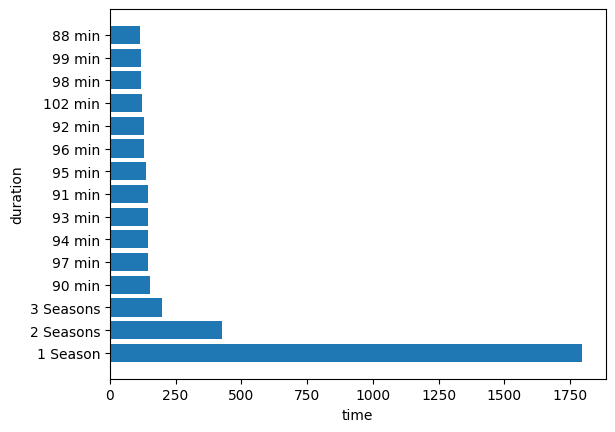

In [41]:
lol=dataset["duration"].value_counts().head(15)
plt.barh(lol.index,lol.values)
plt.xlabel("time")
plt.ylabel("duration")
plt.show()

In [42]:
dataset.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,


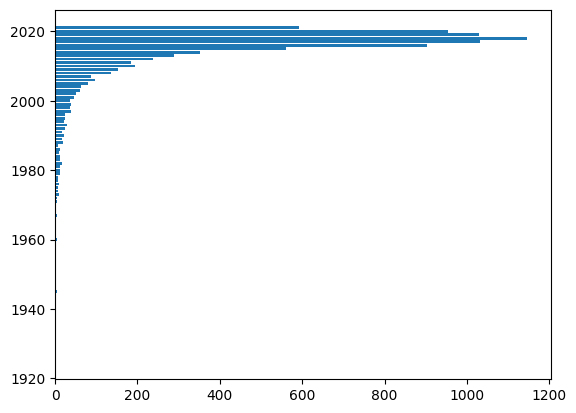

In [43]:
pop=dataset["release_year"].value_counts()
plt.barh(pop.index,pop.values)
plt.show()

In [44]:
dataset.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",


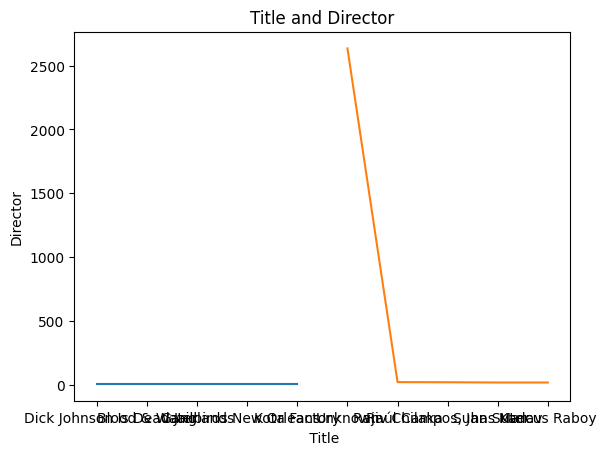

In [56]:
data1=dataset["title"].value_counts().head(5)
data2=dataset["director"].value_counts().head(5)
plt.plot(data1.index,data1.values)
plt.plot(data2.index,data2.values)
plt.xlabel(" Title")
plt.ylabel("Director")
plt.title("Title and Director")
plt.show()

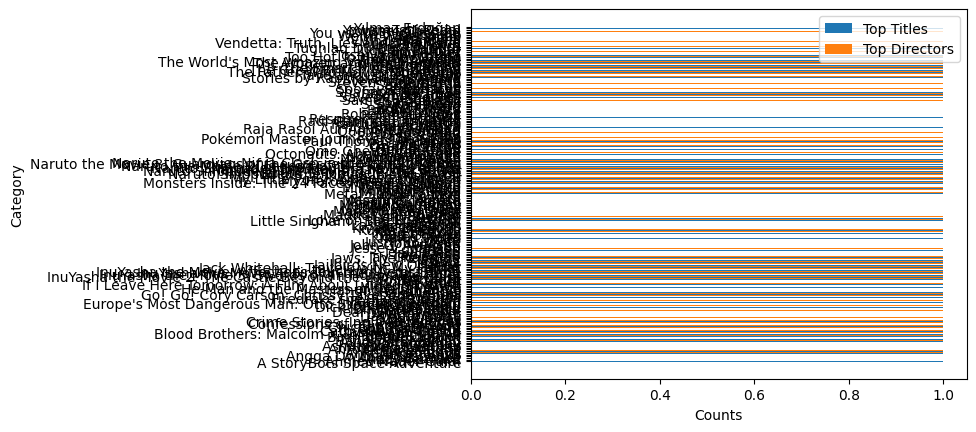

In [59]:
data1=dataset["title"].value_counts().head(100)
data2=dataset["director"].value_counts().head(100)

s1,s2=data1.align(data2,fill_value=0)

y=np.arange(len(s1.index))

plt.barh(y - 0.2,s1.values,height=0.4,label="Top Titles")
plt.barh(y + 0.2,s1.values,height=0.4,label="Top Directors")

plt.yticks(y,s1.index)
plt.xlabel("Counts")
plt.ylabel("Category")
plt.legend()
plt.show()

In [60]:
dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,
